In [1]:
# Some of these are definitely not necessary, but I am too lazy to prune my imports.
import h5py

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from mpl_toolkits import mplot3d

from scipy.stats import norm
from scipy.special import factorial
from scipy.stats import poisson

import random

import os

import pickle



%matplotlib inline

In [2]:
# Imports the h5 file and seperates it out into 
# two major columns- event_id and particle_name
particles = pd.DataFrame(np.array
                         (h5py.File('Pb210_ei.h5')['MC']['particles']
                          ['event_id', 'particle_name']))

In [3]:
# Plug in how may events are in your file and this goes over and determines the number of 
# ionization electrons from each event, seperating them into the num dictionary.
event_num = 50
num = {}
for i in np.arange(0,event_num,1):
    num[i] = len(particles[(particles['particle_name'] == b'ie-' )&
                           (particles['event_id'] == i)]['particle_name'])
#     print (i)
    
# print (num)

In [4]:
# These pickling cells are for if you have massive 
# files and need to handle these one by one due to memory/storage issues.
pickle.dump( num, open( "run1.p", "wb" ) )

In [5]:
ie1 = pickle.load( open( "run1.p", "rb" ) )

In [6]:
# Otherwise, just run this. This was not the most efficient and can be improved, 
# but was written for 30GB data files.

ie = []
ie1 = num
ie.append(list(ie1.values()))
ie_flat = [item for sublist in ie for item in sublist]

In [7]:
# Here are the solid angle calculations

solid_ang_PMT = (np.pi*0.5**2)/(4*np.pi*(12.37)**2)   ##PMT Position
solid_ang_ii = (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2)   ##Image Intensifier

qe = 0.105
EL_yield = 100 * 10 * 0.7

In [8]:
# Applies ie to photon conversion for both solid angles
photoelectrons_PMT = []
for i in ie_flat:
#     I am SURE I had a reason for this i > 0 line, but I have no fucking clue now.
    if i > 0:
        photoelectrons_PMT.append(i * solid_ang_PMT * qe * EL_yield)
        
photoelectrons_ii = []
for i in ie_flat:
#     Same here lol
    if i > 0:
        photoelectrons_ii.append(i * solid_ang_ii * qe * EL_yield)

In [11]:
print (np.mean(photoelectrons_PMT))
print (np.mean(photoelectrons_ii))

8186.539362645563
995.674481681371


0.0


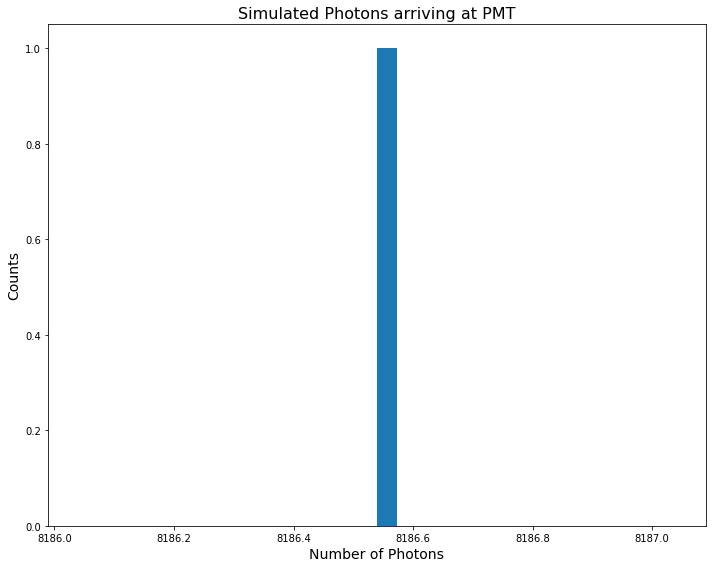

In [13]:
# Initial plots showing the distribution. 
# You'll notice they are the same shape, 
# since they sample from the same distribution.
# This is taken care of next.

fig = plt.figure(figsize = (10,8))
# plt.xlim(1000, 1300)
plt.xlabel('Number of Photons', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Simulated Photons arriving at PMT',fontsize=16)
plt.hist(photoelectrons_PMT, bins = 30)
plt.tight_layout()
# plt.savefig('Pb210_sim_photon_count.png', dpi = 300)

print (np.std(photoelectrons_PMT))
plt.show()

0.0


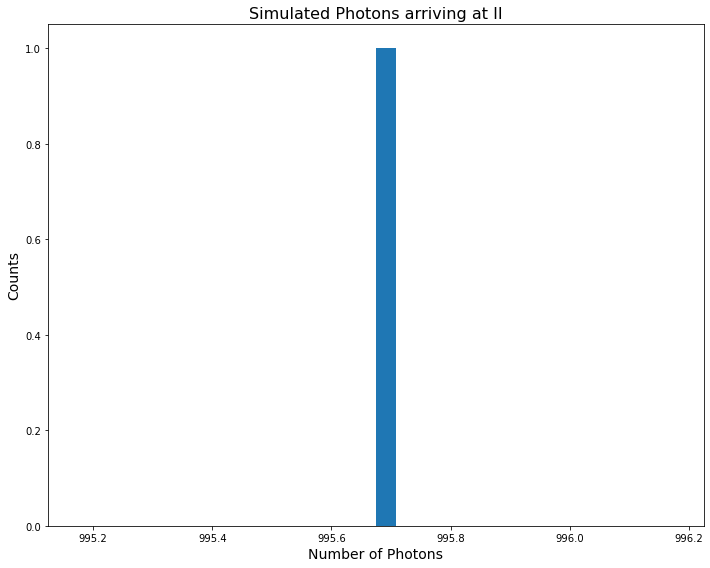

In [14]:
fig = plt.figure(figsize = (10,8))
# plt.xlim(1000, 1300)
plt.xlabel('Number of Photons', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Simulated Photons arriving at II',fontsize=16)
plt.hist(photoelectrons_ii, bins = 30)
plt.tight_layout()
# plt.savefig('Pb210_sim_photon_count.png', dpi = 300)

print (np.std(photoelectrons_ii))
plt.show()

In [15]:
# These apply a Poissonian smearing to the data to both increase 
# the effective count number and make a more physically realistic distribution

In [16]:
photo_pssn_weight_PMT = []
photo_pssn_vals_PMT = []

for i in photoelectrons_PMT:
    weight = []
    vals = []
    for k in np.arange((i-500), (i+501), 1):
        photo_pssn_vals_PMT.append(k)
        pssn = poisson.pmf(np.floor(k), i)
        photo_pssn_weight_PMT.append(pssn)
        
hist_w_PMT = np.asarray(photo_pssn_weight_PMT)/(np.ones(len(photo_pssn_weight_PMT))
                                        *np.max(photo_pssn_weight_PMT))        

In [17]:
photo_pssn_weight_ii = []
photo_pssn_vals_ii = []

for i in photoelectrons_ii:
    weight = []
    vals = []
    for k in np.arange((i-100), (i+101), 1):
        photo_pssn_vals_ii.append(k)
        pssn = poisson.pmf(np.floor(k), i)
        photo_pssn_weight_ii.append(pssn)
        
hist_w_ii = np.asarray(photo_pssn_weight_ii)/(np.ones(len(photo_pssn_weight_ii))
                                        *np.max(photo_pssn_weight_ii))   

0.0


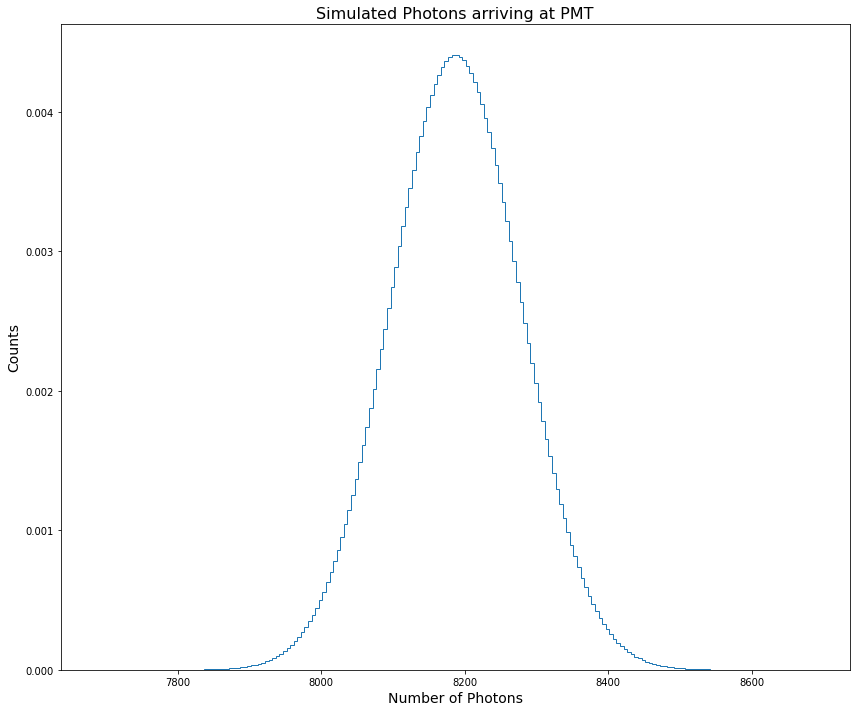

In [18]:
fig = plt.figure(figsize = (12,10))
fig.set_facecolor('white')
# plt.xlim(1050, 1250)
plt.xlabel('Number of Photons', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Simulated Photons arriving at PMT',fontsize=16)
plt.hist(photo_pssn_vals_PMT, bins = 200, weights=hist_w_PMT, 
         histtype = 'step', density = True)

plt.tight_layout()
# plt.savefig('Pb210_sim_photon_count.png', dpi = 300)

print (np.std(photoelectrons_PMT))
plt.show()

0.0


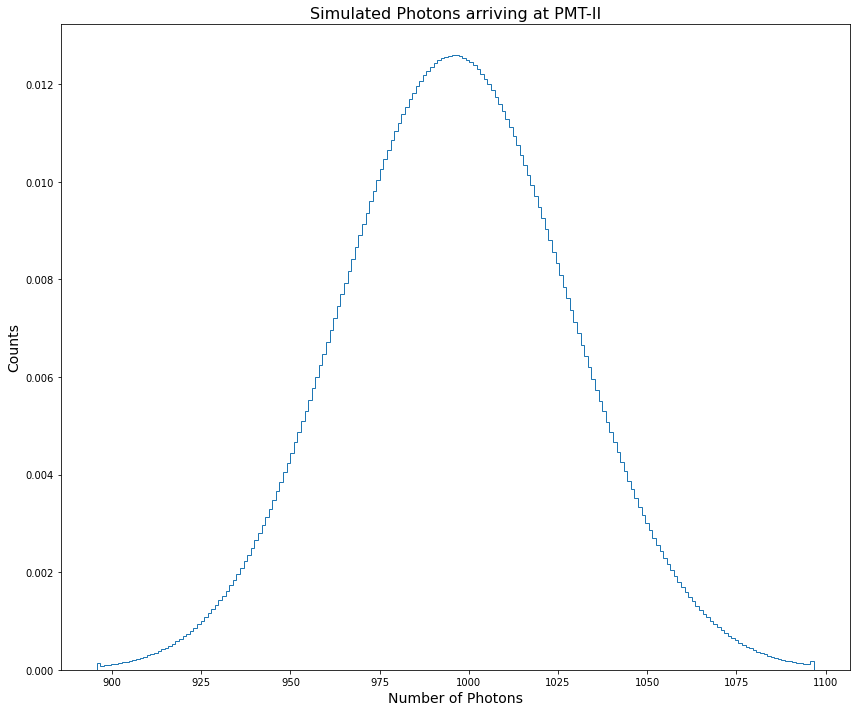

In [19]:
fig = plt.figure(figsize = (12,10))
fig.set_facecolor('white')
# plt.xlim(1050, 1250)
plt.xlabel('Number of Photons', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Simulated Photons arriving at PMT-II',fontsize=16)
plt.hist(photo_pssn_vals_ii, bins = 200, weights=hist_w_ii, 
         histtype = 'step', density = True)

plt.tight_layout()
# plt.savefig('Pb210_sim_photon_count.png', dpi = 300)

print (np.std(photoelectrons_ii))
plt.show()